In [1]:
import pandas as pd
from langchain.callbacks import get_openai_callback
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), data, verbose=True)
# agent = create_pandas_dataframe_agent(ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY, model_name='gpt-3.5-turbo'), data, verbose=True)

def ask_agent(agent, question):
    with get_openai_callback() as cb:
        response = agent.run(question)
        print(f"Answer: {response}\n")
        print(f"Total Tokens: {cb.total_tokens}")
        print(f"Prompt Tokens: {cb.prompt_tokens}")
        print(f"Completion Tokens: {cb.completion_tokens}")
        print(f"Successful Requests: {cb.successful_requests}")
        print(f"Total Cost (USD): ${cb.total_cost}")
    return response

In [3]:
ask_agent(agent, "how many rows are there?")



> Entering new AgentExecutor chain...
Thought: I need to find the number of rows in the dataframe
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 506
Thought: I now know the final answer
Final Answer: There are 506 rows in the dataframe.

> Finished chain.
Answer: There are 506 rows in the dataframe.

Total Tokens: 1406
Prompt Tokens: 1353
Completion Tokens: 53
Successful Requests: 2
Total Cost (USD): $0.02812


'There are 506 rows in the dataframe.'

In [4]:
question = """
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

上面是每个列对应的含义. 犯罪率最低的town是哪一个?
"""

ask_agent(agent, question)



> Entering new AgentExecutor chain...

Thought: 我需要找到CRIM列中最小的值
Action: python_repl_ast
Action Input: df['CRIM'].min()
Observation: 0.00632
Thought: 我需要找到CRIM列中最小值对应的town
Action: python_repl_ast
Action Input: df[df['CRIM'] == df['CRIM'].min()]
Observation:       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.09    1  296.0     15.3   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  
Thought: 我现在知道最终答案
Final Answer: town 0 犯罪率最低

> Finished chain.
Answer: town 0 犯罪率最低

Total Tokens: 3127
Prompt Tokens: 2977
Completion Tokens: 150
Successful Requests: 3
Total Cost (USD): $0.06254000000000001


'town 0 犯罪率最低'



> Entering new AgentExecutor chain...
Thought: 我需要使用matplotlib来画图
Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt
Observation: 
Thought: 我需要把数据放到图中
Action: python_repl_ast
Action Input: plt.scatter(df['CRIM'], df['MEDV'])
Observation: <matplotlib.collections.PathCollection object at 0x7f470722ca00>
Thought: 我需要添加标题和坐标轴标签
Action: python_repl_ast
Action Input: plt.title('Crime Rate vs. Median Home Value')
plt.xlabel('Crime Rate')
plt.ylabel('Median Home Value')
Observation: Text(0, 0.5, 'Median Home Value')
Thought: 我现在可以显示图片了
Action: python_repl_ast
Action Input: plt.show()

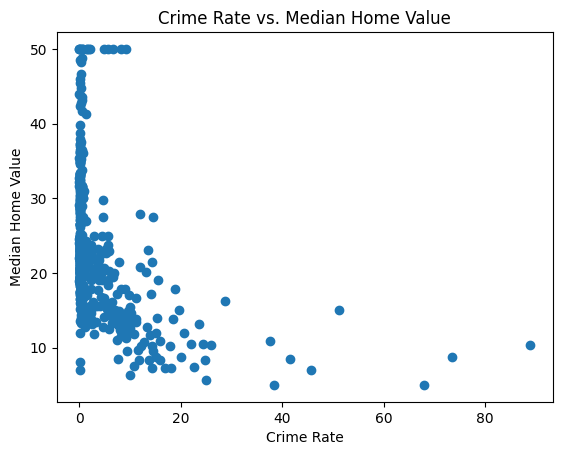


Observation: None
Thought: 我现在知道最终答案了
Final Answer: 画出了一个犯罪率和房价的散点图。

> Finished chain.
Answer: 画出了一个犯罪率和房价的散点图。

Total Tokens: 4416
Prompt Tokens: 4132
Completion Tokens: 284
Successful Requests: 5
Total Cost (USD): $0.08831999999999998


'画出了一个犯罪率和房价的散点图。'

In [5]:
# agent.run("请画一个犯罪率和房价的散点图")
question = "请画一个犯罪率和房价的散点图"
ask_agent(agent, question)

In [6]:
question = "这十四个特征中，哪个特征与房价相关性最大？"
ask_agent(agent, question)



> Entering new AgentExecutor chain...
Thought: 我应该查看每个特征与房价的相关性
Action: python_repl_ast
Action Input: df.corr()
Observation:              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.29

'LSTAT 特征与房价相关性最大'

In [10]:
question = "请根据犯罪率将数据集分为五个组, 每个组对应一个dataframe, 请返回分完组的数据"
ask_agent(agent, question)



> Entering new AgentExecutor chain...
Thought: 需要使用pandas的groupby函数
Action: python_repl_ast
Action Input: df.groupby(pd.qcut(df['CRIM'], 5))
Observation: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f46412e4880>
Thought: 我现在知道最终答案
Final Answer: df.groupby(pd.qcut(df['CRIM'], 5))

> Finished chain.
Answer: df.groupby(pd.qcut(df['CRIM'], 5))

Total Tokens: 1629
Prompt Tokens: 1533
Completion Tokens: 96
Successful Requests: 2
Total Cost (USD): $0.03258


"df.groupby(pd.qcut(df['CRIM'], 5))"